In [2]:
import numpy as np ;
import matplotlib.pyplot as plt ;
import seaborn as sns ; sns.set() ; 
from heapq import heappop, heappush 
from itertools import product

In [7]:
class State: 
    
    def __init__(self, points) :
        self.points = points.copy()
        
    @classmethod 
    def random_points(cls, n) : 
        points = np.random.randint(
                      0, n, size=n )
        return cls(points)
    
    def next_states(self) : 
        p = self.points
        for i, v in enumerate(p) : 
            x = v - 1 
            while x >= 0 : 
                p[i] = x
                yield State(p)
                x -= 1 
                
            x = p[i] = v  
            x += 1 
            while x <= len(p) - 1 :  
                p[i] = x 
                yield State(p)
                x += 1 
            
            p[i] = v 
            
    def print_state(self) : 
        p = self.points
        for i,j in product(range(len(p)), 
                           repeat=2): 
            if j == p[i] : 
                print(" * ", end="")
            else : 
                print(" - ", end="")
                
            if j == len(p) : 
                print("\n")
    
    def __lt__(self, other) : 
        return np.all(self.points < other.points)
    
    def __hash__(self) : 
        return hash(str(self.points))
    
    def __eq__(self, other) : 
        return True 
    

In [8]:
def heuristic(s) : 
    s = s.points 
    x = 0
    for i, v in enumerate(s) : 
        for j, v_ in enumerate(s[i+1:]) :
            if (v_ - v) / (j + 1) in [1,-1] : 
                x += 1 
    return x + (len(s) - len(np.unique(s)))

def search(s) : 
    heap = [(heuristic(s), s)]
    visited = {s}
    while heap : 
        h, v = heappop(heap) 
        if h == 0 : 
            return v.points
        for next_ in v.next_states() : 
            if next_ not in visited : 
                h = heuristic(next_) 
                heappush(heap, (h, next_))
                
        visited |= {v}    

In [9]:
timings = [] 
for i in range(8, 17) :
    t = %timeit -o search(State.random_points(i))
    timings += [t.timings]

The slowest run took 11.47 times longer than the fastest. This could mean that an intermediate result is being cached.
201 ms ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 7.55 times longer than the fastest. This could mean that an intermediate result is being cached.
265 ms ± 207 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 30.53 times longer than the fastest. This could mean that an intermediate result is being cached.
729 ms ± 896 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 9.35 times longer than the fastest. This could mean that an intermediate result is being cached.
742 ms ± 487 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 6.61 times longer than the fastest. This could mean that an intermediate result is being cached.
1.09 s ± 803 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 8.60 times longer than the fastest. This could mean 

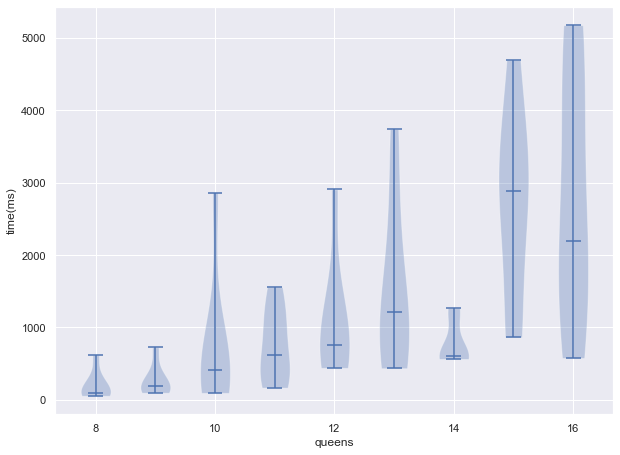

In [10]:
fig = plt.gcf()
fig.set_size_inches(10.0, 7.5)
plt.violinplot(np.array(timings).T * 1e3,
               np.arange(8,17), 
               showmedians=True);
plt.ylabel("time(ms)");
plt.xlabel("queens");
plt.savefig("greedy_results.png")